In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

In [2]:
%matplotlib inline

# Problem 1

Let $u(x) = sin((x + \pi)^2 - 1)$. Use (1.3) - (1.6) to approximate $\frac{1}{2}
u'' − u'$ at the grid points where $a = 0$, $b = 1$, and $n = 10$. Graph the result.

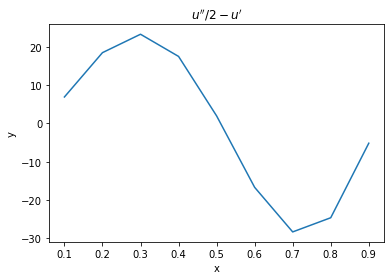

In [3]:
#Setup
a = 0
b = 1
n = 10
h = (b-a)/10
xs = np.linspace(0, 1, n+1)
u = lambda x: np.sin((x+np.pi)**2 - 1)

#Construct matrix and vector in 5.4
A = np.zeros((n-1, n-1))
i, j = np.indices(A.shape)
A[i==j+1] = -1
A[i==j-1] = 1
a = np.zeros(n-1)
a[0] = -u(xs[0])
a[-1] = u(xs[-1])

#Find u'
up = 1/(2*h)*(np.matmul(A, u(xs[1:-1])) + a)

#Construct matrix and vector in 5.6
B = np.zeros((n-1, n-1))
i, j = np.indices(B.shape)
B[i==j-1] = 1
B[i==j+1] = 1
B[i==j] = -2
b = np.zeros(n-1)
b[0] = u(xs[0])
b[-1] = u(xs[-1])

#Find u''
upp = 1/h**2*(np.matmul(B, u(xs[1:-1])) + b)

#Get result
result = 1/2*upp - up

#Make Plot
plt.plot(xs[1:-1], result)
plt.title(r"$u''/2 - u'$")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Problem 2

Use equation (1.9) to solve the singularly perturbed BVP (1.7) with $\epsilon = 1/10, f(x) = -1, \alpha=1,$ and $\beta=3$ on a grid with $n=30$ subintervals. Graph the solution. This BVP is called singularly perturbed because of the location of the parameter $\epsilon$. For $\epsilon=0$ the ODE has a drastically different character - it then becomes first order, and can no longer support two boundary conditions.

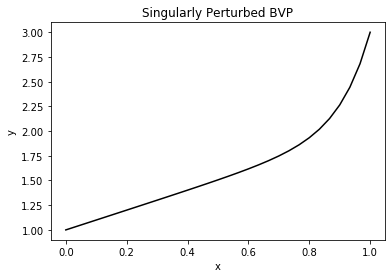

In [4]:
#Setup
eps = 1/10
f = lambda x: -1
f = np.vectorize(f)
alpha = 1
beta = 3
a = 0
b = 1
n = 30
h = (b-a)/n
xs = np.linspace(a, b, n+1)

#Construct Matrix and Vector in 5.9
A = np.zeros((n-1, n-1))
i, j = np.indices(A.shape)
A[i==j] = -2*eps
A[i==j+1] = eps + h/2
A[i==j-1] = eps - h/2
A/=h**2
b = f(xs[1:-1])
b[0] -= alpha*(eps + h/2)/h**2
b[-1] -= beta*(eps-h/2)/h**2

#Solve system
U = la.solve(A, b)

#Add endpoints
U = np.append(U, [3])
U = np.append([1], U)

#Plot solution
plt.plot(xs, U, color="Black")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Singularly Perturbed BVP")
plt.show()

# Problem 3

Visualize the $\mathcal{O}(h^2)$ convergence of this finite difference method by producing a loglog plot similar to Figure 1.2, except in the case $\epsilon=.1$. Implement a function `singular_bvp` to compute the finite difference solution to (1.7). Using $n = 5 \times 2^0,5 \times 2^1, \dots ,5 \times 2^9$ subintervals, compute 10 approximate solutions.

To produce the plot, treat the approximation with $n = 5 \times 2^9$ subintervals as the "true solution", and measure the error for the other approximations against it. Note that, since the number of subintervals for each approximation is a multiple of 2, we can compute the $L_{\infty}$ error for the $n=5 \times 2^j$ approximation by using the `step` argument in the array slicing syntax:

    # best approximation
    sol_best = singular_bvp(eps,alpha,beta,f,5*(2**9))

    # approximation with 5*(2^j) intervals
    sol_approx = singular_bvp(eps,alpha,beta,f,5*(2**j))

    # approximation error
    error = np.max(np.abs(sol_approx - sol_best[::2**(9-j)]))


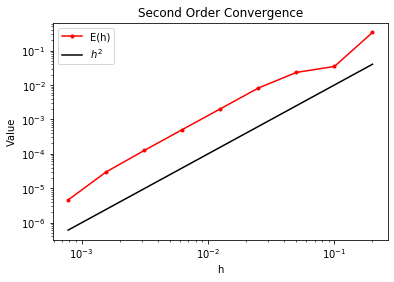

In [14]:
def singular_bvp(eps,alpha,beta,f,n):
    """Solves the singularly perturbed BVP (1.7) using finite differences."""
    h = 1/n
    xs = np.linspace(0, 1, n+1)

    #Construct Matrix and Vector in 5.9
    A = np.zeros((n-1, n-1))
    i, j = np.indices(A.shape)
    A[i==j] = -2*eps
    A[i==j+1] = eps + h/2
    A[i==j-1] = eps - h/2
    A/=h**2
    b = f(xs[1:-1])
    b[0] -= alpha*(eps + h/2)/h**2
    b[-1] -= beta*(eps-h/2)/h**2

    #Solve system
    U = la.solve(A, b)

    #Add endpoints
    U = np.append(U, [3])
    U = np.append([1], U)
    
    return U

#Setup
eps = 1/10
alpha = 1
beta = 3
f = f = lambda x: -1
f = np.vectorize(f)

#Solve system
sol_best = singular_bvp(eps, alpha, beta, f, 5*(2**9))

#Collect errors
errors = []
ns = np.array([5*2**j for j in range(9)])
for j in range(len(ns)):
    sol_approx = singular_bvp(eps, alpha, beta, f, ns[j])
    errors.append(np.max(np.abs(sol_approx - sol_best[::2**(9-j)])))

#Make plots
hs = 1/ns
plt.loglog(hs, errors, label="E(h)", color="Red", marker=".")
plt.loglog(hs, hs**2, label=r"$h^2$", color="Black")
plt.legend()
plt.title("Second Order Convergence")
plt.xlabel("h")
plt.ylabel("Value")
plt.show()

# Problem 4

Extend your finite difference code to the case of a general second order linear BVP with boundary conditions:

\begin{align*}
	&{ } a_1(x)y'' +a_2(x)y'+ a_3(x) y = f(x), \quad x \in (a,b),\\
	&{ } y(a) = \alpha, \quad y(b) = \beta.
\end{align*}

Use your code to solve the boundary value problem

\begin{align*}
	\epsilon y'' - 4(\pi - x^2)y = \cos x, \\
	y(0) = 0, \quad y(\pi/2) = 1,
\end{align*}

for $\epsilon = 0.1$ on a grid with $n=30$ subintervals.

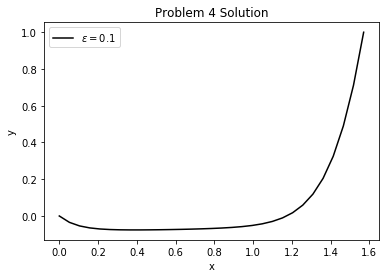

In [17]:
def bvp(a,b,alpha,beta,a1,a2,a3,f,n):
    """Computes the solution to the BVP:
        
        a1(x)y'' + a2(x)y' + a3(x)y = f
        y(a) = α, y(b) = β
        
       using finite differences.
    """
    #Setup
    h = (b-a)/n
    xs = np.linspace(a, b, n+1)
    a1s = a1(xs[1:-1])
    a2s = a2(xs[1:-1])
    a3s = a3(xs[1:-1])


    #Construct Matrix and Vector 
    A = np.zeros((n-1, n-1))
    i, j = np.indices(A.shape)
    A[i==j] = -2*a1s + h**2*a3s
    A[i==j+1] = a1s[1:] -h/2*a2s[1:]
    A[i==j-1] = a1s[:-1] + h/2*a2s[:-1]
    A/=h**2
    b = f(xs[1:-1])
    b[0] -= alpha/h**2*(a1s[0] -h/2*a2s[0])
    b[-1] -= beta/h**2*(a1s[-1] +h/2*a2s[-1])

    #Solve system
    U = la.solve(A, b)

    #Add endpoints
    U = np.append(U, [beta])
    U = np.append([alpha], U)
    
    return U

#Setup
eps = 1/10
a1 = lambda x: eps
a1 = np.vectorize(a1)
a2 = lambda x: 0
a2 = np.vectorize(a2)
a3 = lambda x: -4*(np.pi-x**2)
f = lambda x: np.cos(x)
a = 0
b = np.pi/2
alpha = 0
beta = 1
n=30

#Solve system
U = bvp(a, b, alpha, beta, a1, a2, a3, f, n)

#Plot solution
plt.plot(np.linspace(a, b, n+1), U, color="Black", label=r"$\epsilon={}$".format(eps))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Problem 4 Solution")
plt.legend()
plt.show()

# Problem 5

Numerically solve the boundary value problem

\begin{align*}
	\epsilon y'' + xy' = -\epsilon \pi^2 \cos(\pi x) - \pi x \sin(\pi x), \\
	y(-1) = -2, \quad y(1) = 0,
\end{align*}

for $\epsilon = 0.1, 0.01,$ and $0.001$. Use a grid with $n=150$ subintervals.

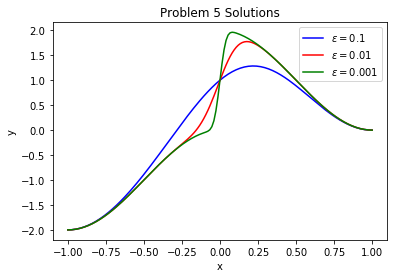

In [16]:
#Setup
a = -1
b = 1
alpha = -2
beta = 0
n=150

#Get solutions for different values of epsilon
for eps, col in zip([0.1, 0.01, 0.001], ["Blue", "Red", "Green"]):
    a1 = lambda x: eps
    a1 = np.vectorize(a1)
    a2 = lambda x: x
    a2 = np.vectorize(a2)
    a3 = lambda x: 0
    a3 = np.vectorize(a3)
    f = lambda x: -eps*np.pi**2*np.cos(np.pi*x)-np.pi*x*np.sin(np.pi*x)
    U = bvp(a, b, alpha, beta, a1, a2, a3, f, n)
    plt.plot(np.linspace(a, b, n+1), U, color=col, label=r"$\epsilon = ${}".format(eps))
    
#Plot solutions
plt.xlabel("x")
plt.ylabel("y")
plt.title("Problem 5 Solutions")
plt.legend()
plt.show()

# Problem 6

Numerically solve the boundary value problem

\begin{align*}
	(\epsilon +x^2)y'' + 4xy' + 2y = 0, \\
	y(-1) = 1/(1+\epsilon), \quad y(1) = 1/(1+\epsilon),
\end{align*}

for $\epsilon = 0.05, 0.02$. Use a grid with $n=150$ subintervals.

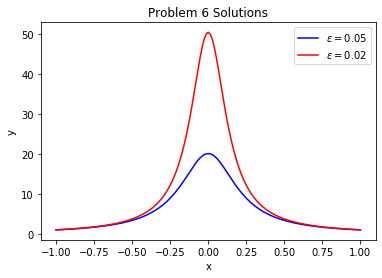

In [11]:
#Setup
a = -1
b = 1
n=150

#Get solutions for different values of epsilon
for eps, col in zip([0.05, 0.02], ["Blue", "Red"]):
    alpha = 1/(1+eps)
    beta = 1/(1+eps)
    a1 = lambda x: (eps+x**2)
    a1 = np.vectorize(a1)
    a2 = lambda x: 4*x
    a2 = np.vectorize(a2)
    a3 = lambda x: 2
    a3 = np.vectorize(a3)
    f = lambda x: 0
    f = np.vectorize(f)
    U = bvp(a, b, alpha, beta, a1, a2, a3, f, n)
    plt.plot(np.linspace(a, b, n+1), U, color=col, label=r"$\epsilon = ${}".format(eps))
    
#Plot solution
plt.xlabel("x")
plt.ylabel("y")
plt.title("Problem 6 Solutions")
plt.legend()
plt.show()